## Test of Homography based on OpenCV: "Image Features & Alignment with OpenCV" video


In [1]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Read Template and Scanned images

In [2]:
# Read reference images

refFilename = "Images/TestBlokk/TestBlokk3.jpg"
# refFilename = "Images/ChessBoards/LimitedBoards2/000001.bmp"
print("Reference image: ", refFilename)
img_1 = cv2.imread(refFilename, cv2.IMREAD_COLOR)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

# Image to be aligned
imgFilename = "Images/TestBlokk/TestBlokk4.jpg"
# imgFilename = "Images/ChessBoards/LimitedBoards2/000003.bmp"
print("Image to align: ", imgFilename)
img_2 = cv2.imread(imgFilename, cv2.IMREAD_COLOR)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

Reference image:  Images/TestBlokk/TestBlokk3.jpg
Image to align:  Images/TestBlokk/TestBlokk4.jpg


Text(0.5, 1.0, 'Image to align')

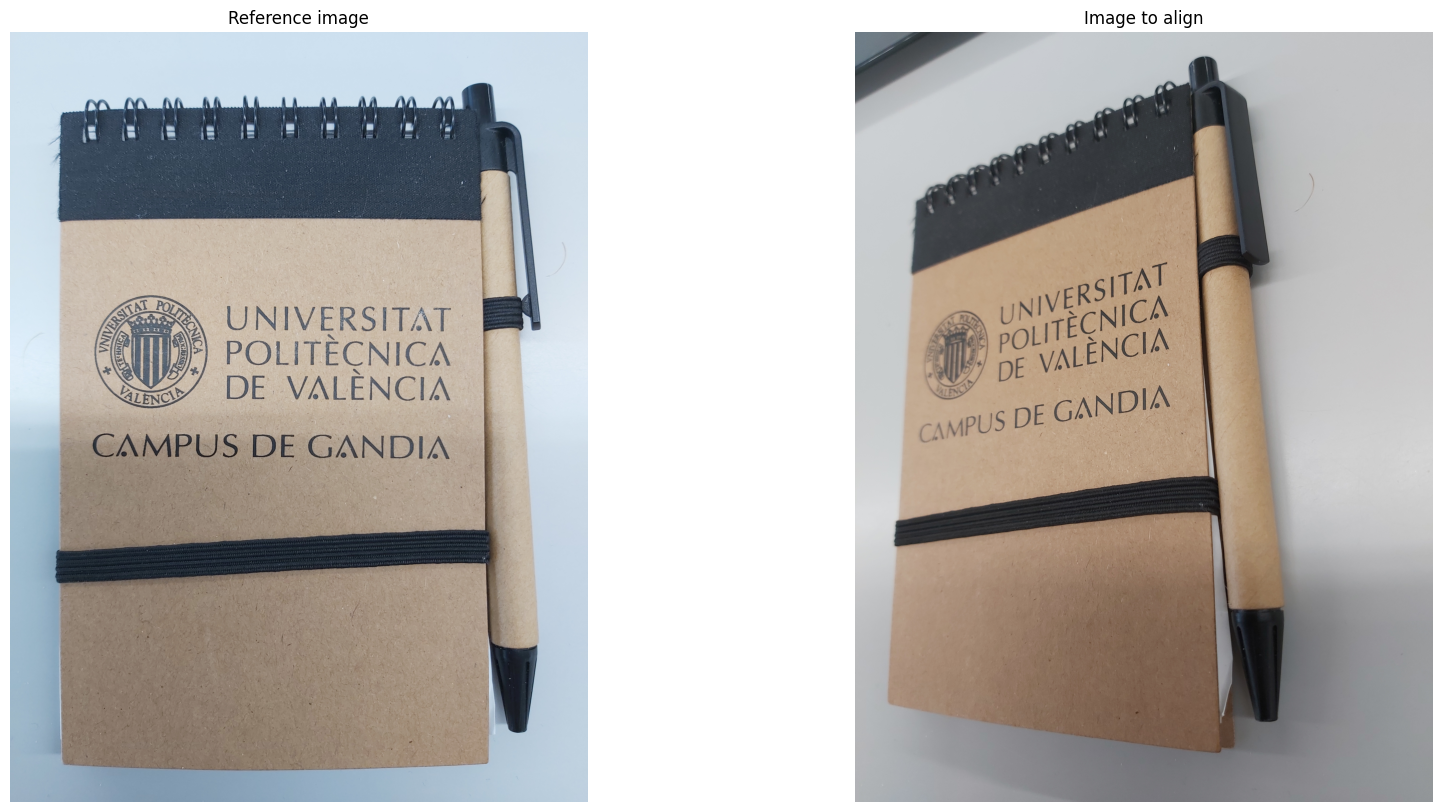

In [3]:
# Display images

plt.figure(figsize=[20,10])
plt.subplot(121);plt.axis("off");plt.imshow(img_1);plt.title("Reference image")
plt.subplot(122);plt.axis("off");plt.imshow(img_2);plt.title("Image to align")


## Find keypoints in both images

In [4]:
# Convert images to grayscale

img_1_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
img_2_gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

# Detect ORB features:
MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints_1, descriptors_1 = orb.detectAndCompute(img_1_gray, None)
keypoints_2, descriptors_2 = orb.detectAndCompute(img_2_gray, None)

# Display
img_1_display = cv2.drawKeypoints(img_1, keypoints_1, outImage=np.array([]), color=(255,0,0), flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
img_2_display = cv2.drawKeypoints(img_2, keypoints_2, outImage=np.array([]), color=(255,0,0), flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)


Text(0.5, 1.0, 'Image to align')

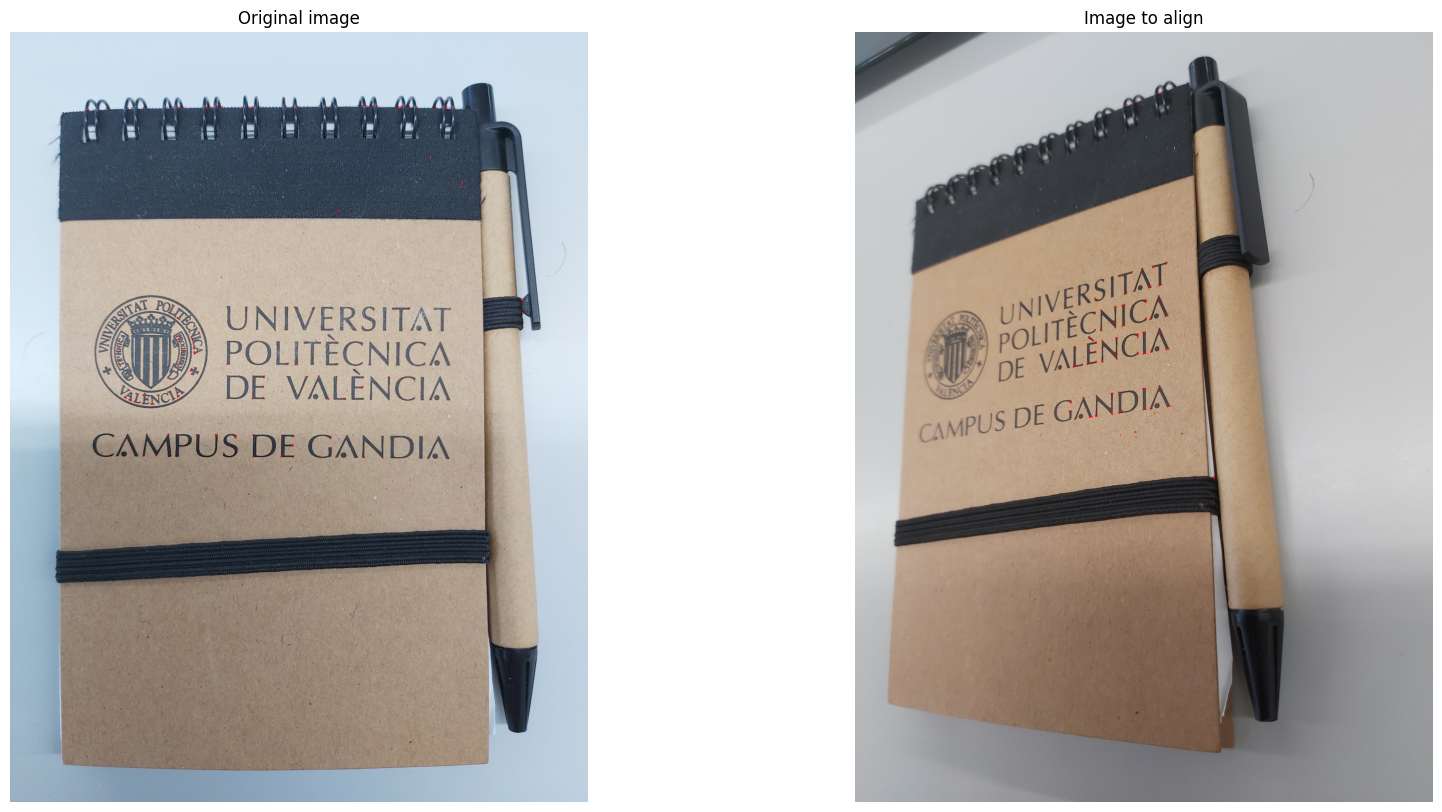

In [5]:
# Show images:
plt.figure(figsize=[20,10])
plt.subplot(121);plt.axis("off");plt.imshow(img_1_display);plt.title("Original image")
plt.subplot(122);plt.axis("off");plt.imshow(img_2_display);plt.title("Image to align")

## Match keypoints

In [6]:
# Match features
matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors_1, descriptors_2, None)
matches = list(matches)


# Sort matches by score
matches = list(matches)
matches.sort(key=lambda x: x.distance, reverse=False) # Orig matches.sort

# Keep best 10% of matches
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]

Text(0.5, 1.0, 'Original image')

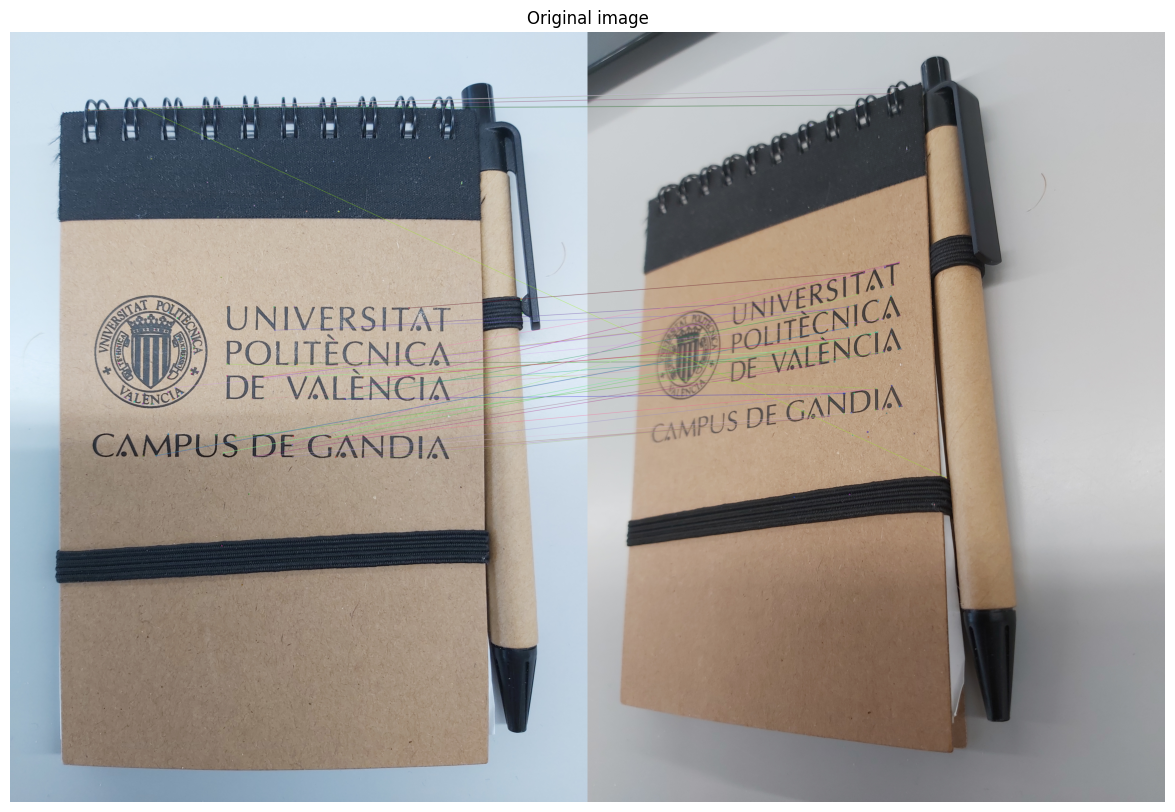

In [7]:
# Draw top matches
img_matches = cv2.drawMatches(img_1, keypoints_1, img_2, keypoints_2, matches, None)

plt.figure(figsize=[40,10])
plt.imshow(img_matches);plt.axis("off");plt.title("Original image")

## Find Homography

In [8]:
# Extract location of good matches
points_1 = np.zeros((len(matches), 2), dtype=np.float32)
points_2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points_1[i, :] = keypoints_1[match.queryIdx].pt
    points_2[i, :] = keypoints_2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points_2, points_1, cv2.RANSAC)

## Warp image

Text(0.5, 1.0, 'Warped image')

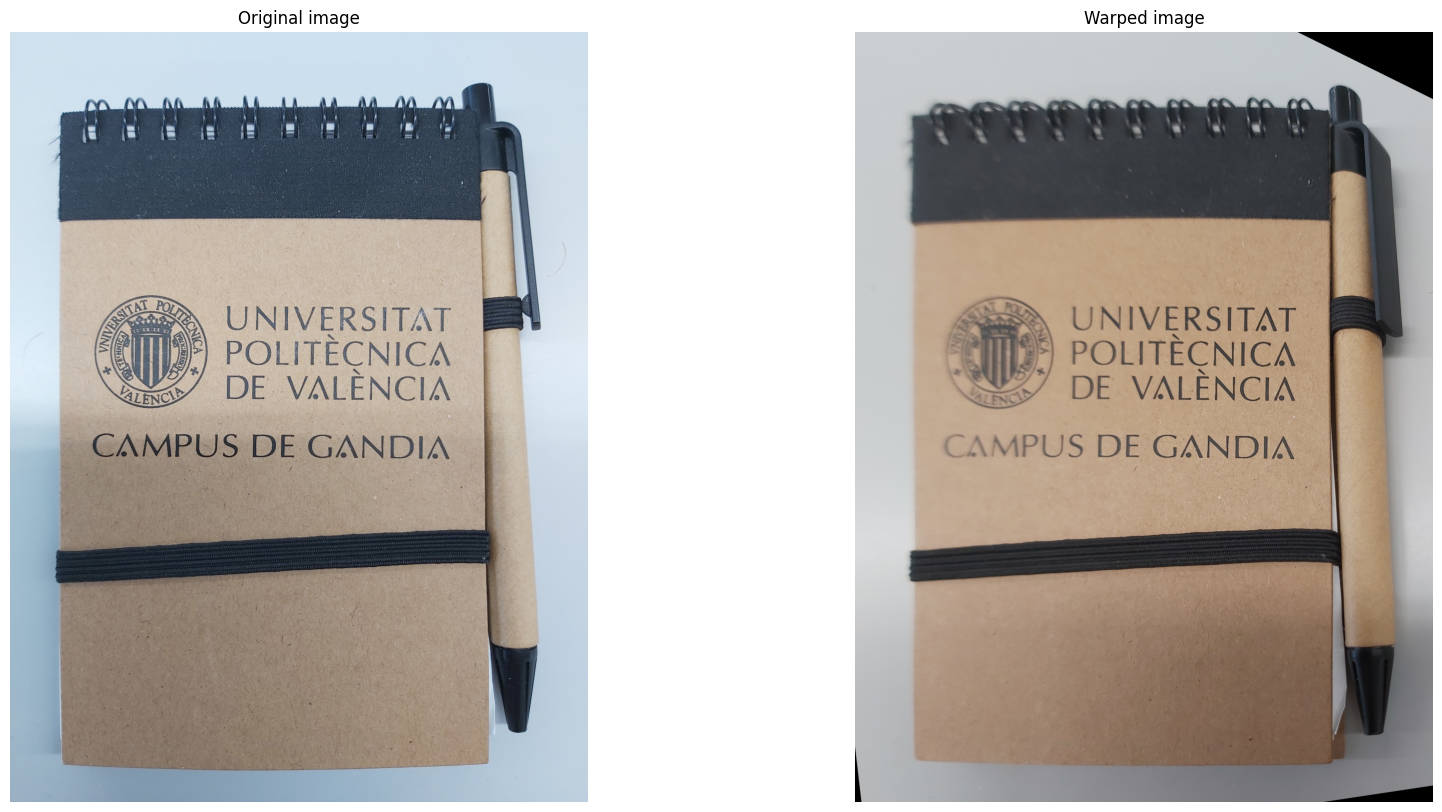

In [9]:
# Use homography to warp image
height, width, channels =  img_1.shape
img_2_reg = cv2.warpPerspective(img_2, h, (width, height))

# Display results
plt.figure(figsize=[20, 10])
plt.subplot(121);plt.imshow(img_1);plt.axis("off");plt.title("Original image")
plt.subplot(122);plt.imshow(img_2_reg);plt.axis("off");plt.title("Warped image")
